<a href="https://colab.research.google.com/github/YoooonaLee/machine_learning/blob/main/%EC%95%84%EC%9D%B4%EB%A6%AC%EC%8A%A4_%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset 정리

#feature > 4

sepal length (cm)

sepal width (cm)

petal length (cm)

petal width (cm)







#target > 3


label:0,1,2

total:150rows => (label마다 50개씩)


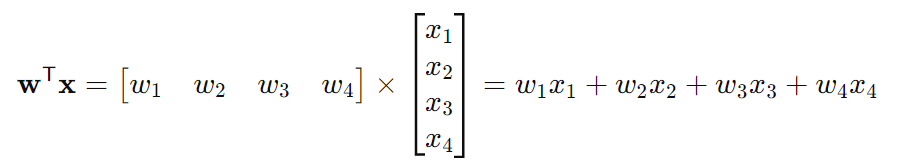

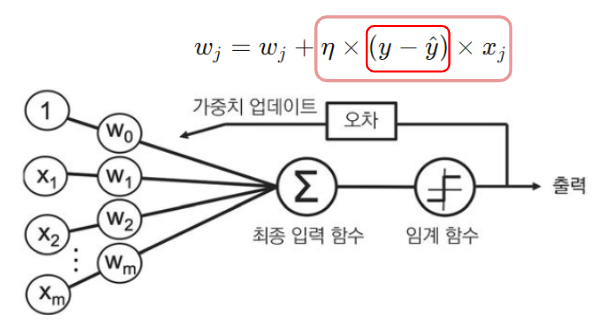

샘플마다 계속해서 오차를 계산하고 이에따라 가중치를 업데이트하면서 최종적인 w1,w2,w3,w4 값 즉 기울기 값을 찾는게 목표임.  
                                                 즉 가중치를 계속해서 업데이트하면서 어떤 피처를 더 중요하게 선택할지 정하고 이에따라 결정선을 정한다.

In [ ]:
# 붓꽃 데이터 로드
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

# Create DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add label column with target values
iris_df['label'] = iris.target



# 레이블 값이 3개                                                  => 퍼셉트론은 이진분류인데 어떻게 3개를 나누지?
# 우선은 이진분류 먼저 시도

In [ ]:
iris_df['label'].unique()

array([0, 1, 2])

In [ ]:
label_counts = iris_df.groupby('label').size()
label_counts

,0
label,
0,50
1,50
2,50


In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#📖퍼셉트론으로 이진분류해보기

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import load_iris



# Filter only Versicolor (label 1) and Setosa (label 0)
binary_df = iris_df[iris_df['label'].isin([0, 1])]

# Set features (all 4 features) and binary target (Versicolor vs Setosa)
X = binary_df[iris.feature_names]
y = binary_df['label']  # Target is either 0 (Setosa) or 1 (Versicolor)


In [ ]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [ ]:
y

,label
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 퍼셉트론 모델 초기화 및 학습
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_scaled, y)  # (input데이터 즉 각 피처들  ,  레이블값)


# 전체 데이터로 예측 수행
y_pred = perceptron.predict(X_scaled)


# 정확도 출력
accuracy = accuracy_score(y, y_pred)
print(f"{accuracy}의 정확도로 퍼셉트론이 분류하였습니다.")

1.0의 정확도로 퍼셉트론이 분류하였습니다.


#(GPT) PCA차원축소해서 붓꽃데이터 이진분류 분류개형 확인
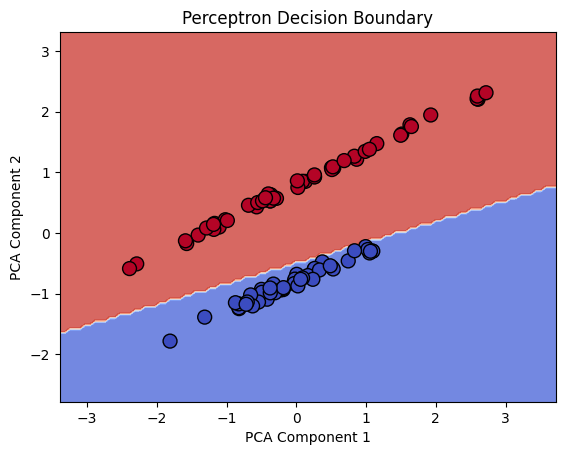

# 📖퍼셉트론으로 다중분류 해보기

레이블 값이 3개로 분류된다. => 퍼셉트론은 기본적으로 이진분류인데 어떻게 3개를 나누지

퍼셉트론 자체가 기본적으로 ⭐**이진분류** (활성화함수를 적용시킨다음 그 적용시킨 가중합이 threshold를 넘냐 or 안넘냐!!)이기 때문에,   
setosa vs 나머지, virginica vs 나머지, virsicolor vs 나머지 이렇게  분류해보도록 하겠음=> 이걸 일대다? 방식이라고 함.

In [ ]:
X = iris_df[iris.feature_names]  # All 4 features
y = iris_df['label']  # Target

여기서 퍼셉트론을 사용하여 일대다(One-vs-All) 방식을 적용하는 경우, 각 클래스에 대해 3개의 이진 분류기를 학습시킨다.

다중 클래스 문제로 확장할 때는 각 클래스에 대해 이러한 이진 분류기를 여러 개 적용하는 방식(예: 일대다 방식)을 사용하게 된다.

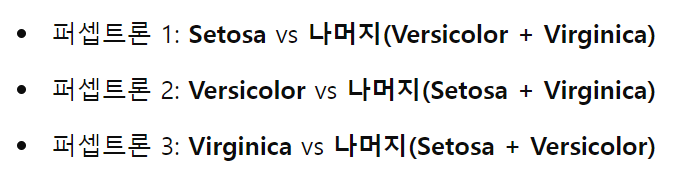

퍼셉트론에서는 계단 함수 형태의 활성화 함수가 사용됩니다.


다중 클래스 분류에서는 일대다(one-vs-all) 방식을 통해 각 클래스에 대해 이진 분류를 수행하고, 계단 함수를 통해 결과를 도출합니다.


활성화 함수는 필수이며, 퍼셉트론이 제대로 작동하기 위해서는 반드시 사용됩니다. 다만, 현대적 신경망에서 쓰이는 비선형 활성화 함수는 사용되지 않고, 단순한 선형적인 계단 함수가 사용됩니다.

##📖퍼셉트론으로 다중분류하기

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron ## linear_model?? 즉 퍼셉트론 모델은 무조건 일단 선형모델인거임.
from sklearn.metrics import accuracy_score



# 붓꽃 특성들 표준화 (Perceptron은 스케일에 민감하다고 함)
# >평균이 0 분산이 1이 되도록 표준화해줌
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 퍼셉트론 모델 초기화 및 학습
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_scaled, y)


# 전체 데이터로 예측 수행
y_pred = perceptron.predict(X_scaled)

# 정확도 출력
accuracy = accuracy_score(y, y_pred)
print(f"{accuracy}의 정확도로 퍼셉트론이 분류하였습니다.")


0.8666666666666667의 정확도로 퍼셉트론이 분류하였습니다.


#GPT(다중분류에서의 분류개형 확인)

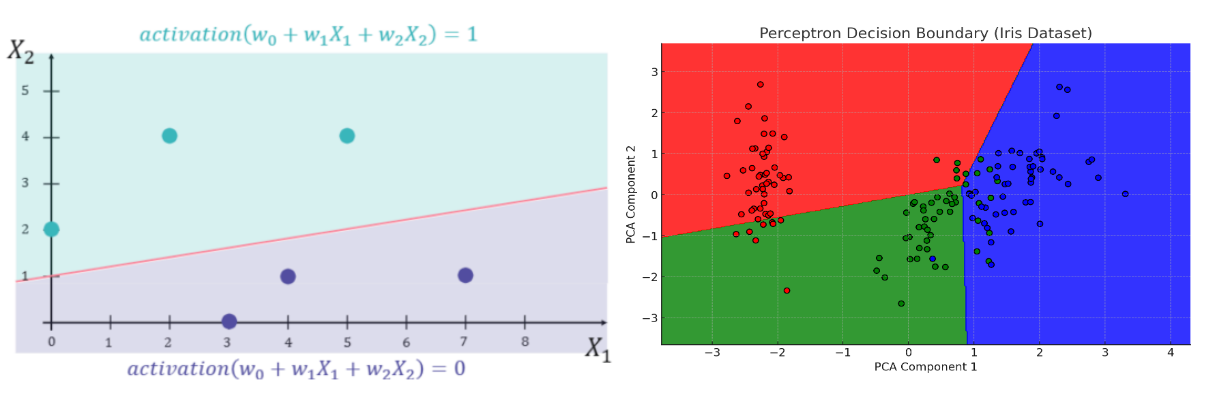